## Arabic characters

## Random Forest

Shape of first image in X_test: (1024,)
Label of first image: 24.png
Accuracy: 0.7247023809523809
Classification Report:
               precision    recall  f1-score   support

       1.png       0.87      0.98      0.92       120
      10.png       0.65      0.85      0.74       120
      11.png       0.70      0.65      0.67       120
      12.png       0.73      0.85      0.78       120
      13.png       0.79      0.72      0.75       120
      14.png       0.66      0.72      0.69       120
      15.png       0.73      0.60      0.66       120
      16.png       0.73      0.80      0.76       120
      17.png       0.69      0.62      0.65       120
      18.png       0.59      0.63      0.61       120
      19.png       0.69      0.62      0.65       120
       2.png       0.73      0.91      0.81       120
      20.png       0.66      0.61      0.63       120
      21.png       0.72      0.61      0.66       120
      22.png       0.94      0.79      0.86       120
      23.png 

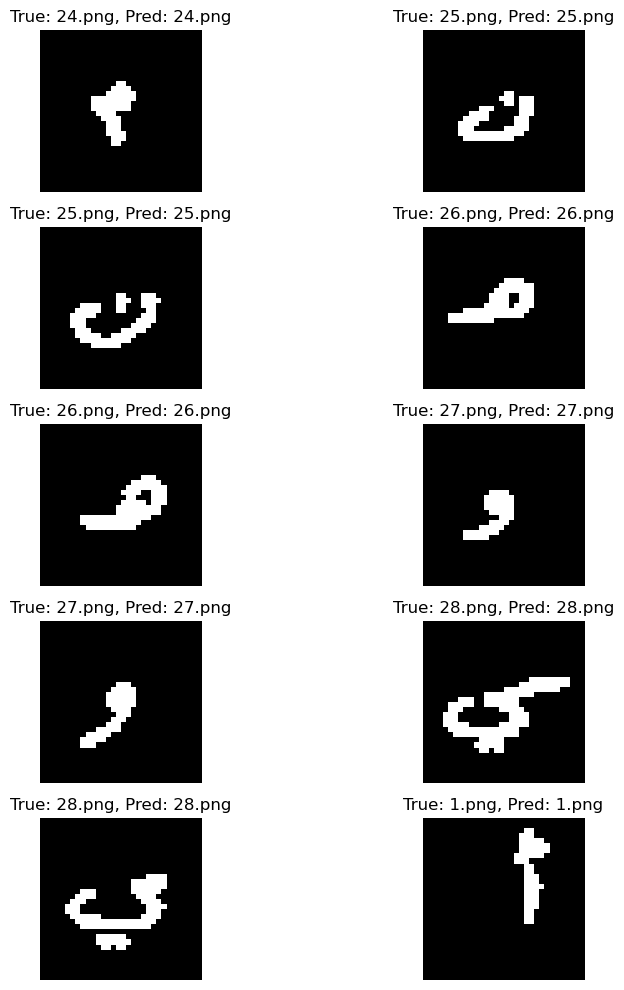

In [10]:
import os
import cv2  # OpenCV for image processing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Paths for train and test folders
train_folder = r"C:\Users\71591\Desktop\dataset\train"
test_folder = r"C:\Users\71591\Desktop\dataset\test"

# Function to load image data (without resizing, since original is 32x32)
def load_images_from_folder(folder):
    data = []
    labels = []  # To store the image labels
    for file_name in os.listdir(folder):
        file_path = os.path.join(folder, file_name)
        # Load the image in its original 32x32 size (no resizing)
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            # Extract the label from the filename
            label_part = file_name.split('_')[3]  # Extracts the label after 'label_'
            
            data.append(img.flatten())  # Flatten the image to a 1D vector (1024 elements)
            labels.append(label_part)  # Store the label
    
    return np.array(data), np.array(labels)

# Load train and test data (with correct 32x32 image size)
X_train, y_train = load_images_from_folder(train_folder)
X_test, y_test = load_images_from_folder(test_folder)

# Print the shape of the first image and its label to verify
print(f"Shape of first image in X_test: {X_test[0].shape}")  # This should be (1024,) if correctly flattened
print(f"Label of first image: {y_test[0]}")

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions on test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Function to plot test images with their predicted labels (using 32x32 size)
def plot_images_with_predictions(X_test, y_test, y_pred, num_images=10):
    plt.figure(figsize=(10, 10))
    
    for i in range(num_images):
        plt.subplot(5, 2, i + 1)
        
        # Reshape the flattened image back to 32x32 for visualization
        img = X_test[i].reshape(32, 32)  # Since images were originally 32x32
        
        # Plot the image
        plt.imshow(img, cmap='gray')
        
        # Add the true label and predicted label as the title
        plt.title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize the first 10 test images with their true labels and predicted labels
plot_images_with_predictions(X_test, y_test, y_pred, num_images=10)


## XGBoost

XGBoost Accuracy: 0.73125
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       120
           1       0.82      0.89      0.85       120
           2       0.64      0.68      0.66       120
           3       0.70      0.64      0.67       120
           4       0.72      0.65      0.68       120
           5       0.66      0.77      0.71       120
           6       0.70      0.60      0.65       120
           7       0.70      0.78      0.74       120
           8       0.67      0.70      0.68       120
           9       0.70      0.86      0.77       120
          10       0.66      0.69      0.68       120
          11       0.77      0.80      0.78       120
          12       0.74      0.74      0.74       120
          13       0.67      0.66      0.66       120
          14       0.72      0.59      0.65       120
          15       0.67      0.68      0.68       120
          16       0.67

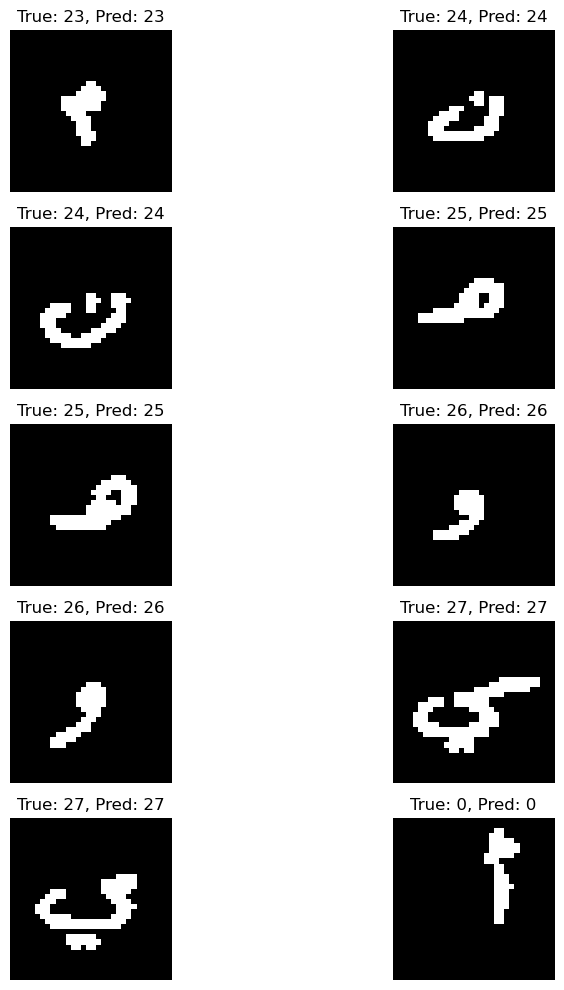

In [14]:
import os
import cv2  # OpenCV for image processing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb  # XGBoost

# Paths for train and test folders
train_folder = r"C:\Users\71591\Desktop\dataset\train"
test_folder = r"C:\Users\71591\Desktop\dataset\test"

# Function to load image data (without resizing, since original is 32x32)
def load_images_from_folder(folder):
    data = []
    labels = []
    for file_name in os.listdir(folder):
        file_path = os.path.join(folder, file_name)
        # Load the image in its original 32x32 size (no resizing)
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            # Extract the label from the filename by splitting the filename at '_'
            # Get the label part, and remove any file extension
            label_part = file_name.split('_')[3].split('.')[0]  # Extract the numeric label and remove .png
            
            data.append(img.flatten())  # Flatten the image to a 1D vector (1024 elements)
            labels.append(label_part)  # Store the label
    
    return np.array(data), np.array(labels)

# Load train and test data (with correct 32x32 image size)
X_train, y_train = load_images_from_folder(train_folder)
X_test, y_test = load_images_from_folder(test_folder)

# Convert labels to integers for XGBoost and subtract 1 to start from 0
y_train = y_train.astype(int) - 1  # Subtract 1 from labels to make them start from 0
y_test = y_test.astype(int) - 1

# Train XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Predictions on test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy}")
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred))

# Function to plot test images with their predicted labels (using 32x32 size)
def plot_images_with_predictions(X_test, y_test, y_pred, num_images=10):
    plt.figure(figsize=(10, 10))
    
    for i in range(num_images):
        plt.subplot(5, 2, i + 1)
        
        # Reshape the flattened image back to 32x32 for visualization
        img = X_test[i].reshape(32, 32)  # Since images were originally 32x32
        
        # Plot the image
        plt.imshow(img, cmap='gray')
        
        # Add the true label and predicted label as the title
        plt.title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize the first 10 test images with their true labels and predicted labels
plot_images_with_predictions(X_test, y_test, y_pred, num_images=10)


## News Category Dataset

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
dataset_path = r"C:\Users\71591\Desktop\dataset\News_Category_Dataset_v3.json"
data = pd.read_json(dataset_path, lines=True)

# Display the first few rows of the dataset to understand its structure
data.head()


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [27]:
# Step 1: Check for missing values
missing_values = data.isnull().sum()  # Check how many null values there are in each column
missing_values  # Display missing values in each column


headline    0
category    0
dtype: int64

In [29]:
# Step 3: Check for unique values in 'category' to see if there are any inconsistencies
unique_categories = data_clean['category'].unique()
unique_categories  # Display the unique categories to ensure consistency

# Step 4: Check for any empty headlines
empty_headlines = data_clean[data_clean['headline'].str.strip() == '']
empty_headlines  # Display rows with empty headlines (if any)

,headline,category
90944,,POLITICS
95567,,RELIGION
103675,,WORLDPOST
109100,,BUSINESS
110153,,MEDIA
122145,,QUEER VOICES


In [32]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Use the cleaned data
X = data_clean['headline']  # Features (text data)
y = data_clean['category']  # Labels (categories)

# Step 2: Convert categories (y) to numerical labels using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert categories to integers

# Step 3: Check the mapping of categories to numerical labels
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
category_mapping  # This shows the mapping of categories to their corresponding numeric values

# Now `y_encoded` contains the numerical labels, which can be used for classification models


{'ARTS': 0,
 'ARTS & CULTURE': 1,
 'BLACK VOICES': 2,
 'BUSINESS': 3,
 'COLLEGE': 4,
 'COMEDY': 5,
 'CRIME': 6,
 'CULTURE & ARTS': 7,
 'DIVORCE': 8,
 'EDUCATION': 9,
 'ENTERTAINMENT': 10,
 'ENVIRONMENT': 11,
 'FIFTY': 12,
 'FOOD & DRINK': 13,
 'GOOD NEWS': 14,
 'GREEN': 15,
 'HEALTHY LIVING': 16,
 'HOME & LIVING': 17,
 'IMPACT': 18,
 'LATINO VOICES': 19,
 'MEDIA': 20,
 'MONEY': 21,
 'PARENTING': 22,
 'PARENTS': 23,
 'POLITICS': 24,
 'QUEER VOICES': 25,
 'RELIGION': 26,
 'SCIENCE': 27,
 'SPORTS': 28,
 'STYLE': 29,
 'STYLE & BEAUTY': 30,
 'TASTE': 31,
 'TECH': 32,
 'THE WORLDPOST': 33,
 'TRAVEL': 34,
 'U.S. NEWS': 35,
 'WEDDINGS': 36,
 'WEIRD NEWS': 37,
 'WELLNESS': 38,
 'WOMEN': 39,
 'WORLD NEWS': 40,
 'WORLDPOST': 41}

## Logestic Regression

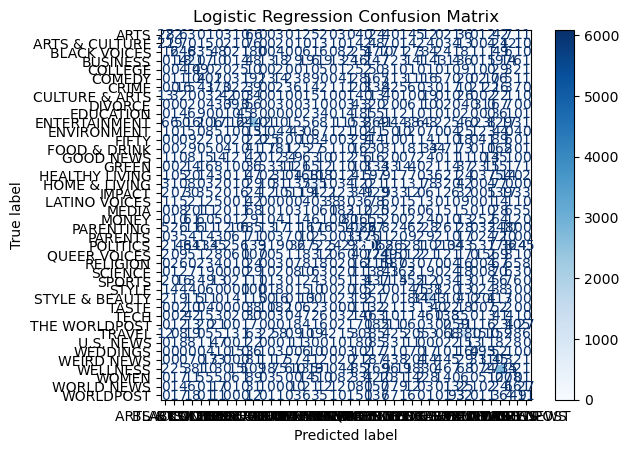

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Use the cleaned data
X = data_clean['headline']  # Features (text data)
y = data_clean['category']  # Labels (categories)

# Step 2: Convert categories (y) to numerical labels using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert categories to integers

# Step 3: Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 4: Convert text data into numerical form using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))  # Limit features to 5000 and use 1-2 grams
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 5: Initialize and train Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_tfidf, y_train)

# Step 6: Predict and evaluate
y_pred = logreg.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Display the accuracy and classification report directly
accuracy, report

# Step 7: Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


In [37]:
# Step 6: Predict and evaluate
y_pred = logreg.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Display the accuracy and classification report directly
accuracy  # This will display the accuracy in Jupyter



0.5413305970505417

## SVM

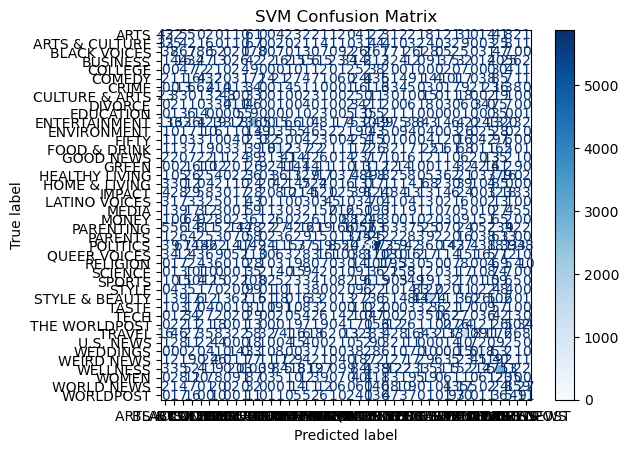

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize and train SVM (Support Vector Classifier)
svm = SVC(kernel='linear', random_state=42)  # Using a linear kernel for text classification
svm.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_svm = svm.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Display the accuracy and classification report directly in Jupyter
accuracy_svm  # Display accuracy
report_svm  # Display classification report

# Plot Confusion Matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=label_encoder.classes_)
disp_svm.plot(cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.show()


In [39]:
accuracy_svm

0.539517014270033

## Decision Tree

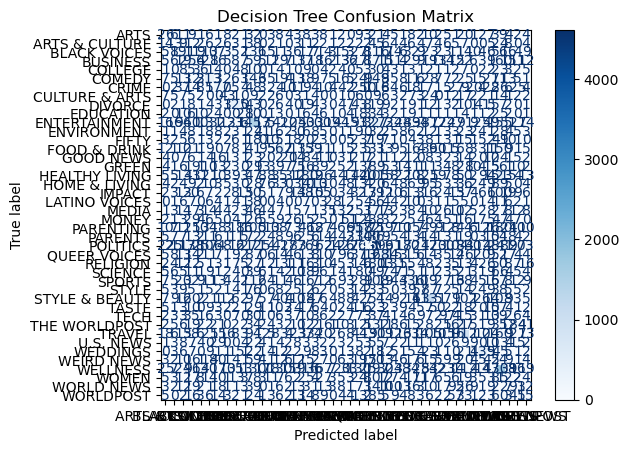

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 5: Initialize and train Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_tfidf, y_train)

# Step 6: Predict and evaluate
y_pred_tree = decision_tree.predict(X_test_tfidf)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Display the accuracy and classification report directly in Jupyter
accuracy_tree  # Display accuracy
report_tree  # Display classification report

# Step 7: Plot Confusion Matrix
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=label_encoder.classes_)
disp_tree.plot(cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()


In [41]:
accuracy_tree 

0.3790626640576528

## Random Forest

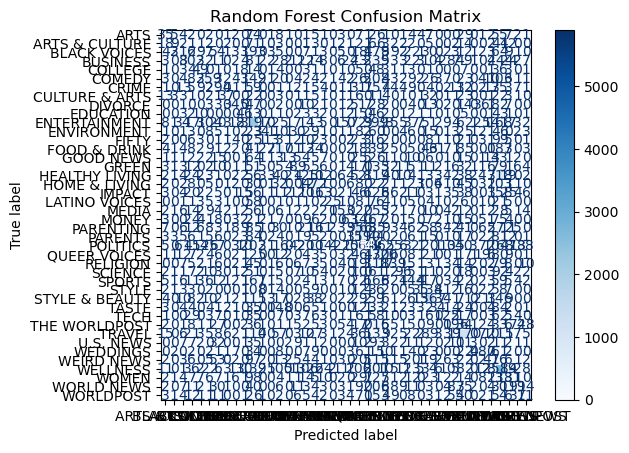

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 5: Initialize and train Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # Using 100 trees
random_forest.fit(X_train_tfidf, y_train)

# Step 6: Predict and evaluate
y_pred_rf = random_forest.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display the accuracy and classification report directly in Jupyter
accuracy_rf  # Display accuracy
report_rf  # Display classification report

# Step 7: Plot Confusion Matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=label_encoder.classes_)
disp_rf.plot(cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()


In [43]:
accuracy_rf 

0.4868515248413115

## XGBoost

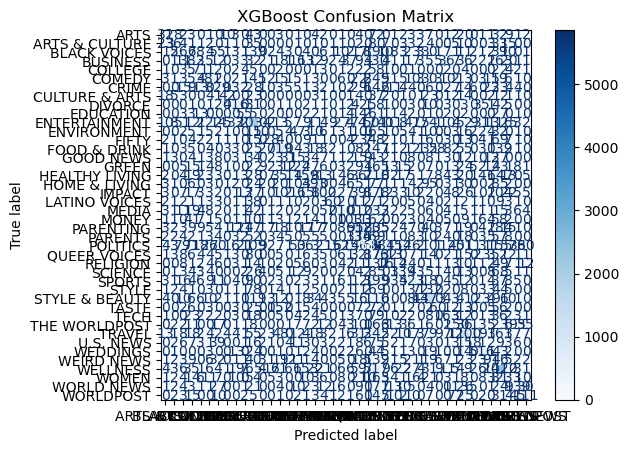

In [44]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 5: Initialize and train XGBoost
xgboost_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgboost_model.fit(X_train_tfidf, y_train)

# Step 6: Predict and evaluate
y_pred_xgb = xgboost_model.predict(X_test_tfidf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display the accuracy and classification report directly in Jupyter
accuracy_xgb  # Display accuracy
report_xgb  # Display classification report

# Step 7: Plot Confusion Matrix
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=label_encoder.classes_)
disp_xgb.plot(cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.show()


In [45]:
accuracy_xgb

0.5101894716747005